# Exercises - Working with NumPy

### Exercise 1: Basic Indexing
Create a 1D NumPy array `arr` of integers from 10 to 19. Access the element at index 3.

In [ ]:
# Your code here

### Exercise 2: Slicing
Slice the array `arr` to get elements from index 2 to 6 included.

In [ ]:
# Your code here

### Exercise 3: Step Slicing
Use slicing with a step to get every second element from index 1 to 9.

In [ ]:
# Your code here

### Exercise 4: Copy vs View
Demonstrate that slicing creates a view, not a copy, by modifying a slice and showing the original array changes.

In [ ]:
# Your code here

### Exercise 5: Copying Arrays
Use `.copy()` to create a slice that doesn't affect the original array. In particular, select only the elements from index 2 to 5 and assign 99 to all of them. Show that the original array remains unchanged.

In [ ]:
# Your code here

### Exercise 6: Generating sequences and Boolean indexing

Generate a NumPy sequence of 100 integers from 0 to 99. Use Boolean indexing to select only the even numbers from this array.

In [ ]:
# Your code here

### Exercise 8: Random Array Generation

Random numbers from arbitrary distributions are in fact generated through the transformation of uniformly distributed random numbers.

The trick is the following:

- calculate the cumulative distribution function (CDF) of the desired distribution
- calculate the inverse of the CDF (also known as the quantile function), which maps probabilities (values between 0 and 1) to values of the random variable
- sample a uniformly distributed random number between 0 and 1 and use the the inverse CDF to read off the value of the random variable.


Let's take the example of the exponential distribution. This is defined by the following probability density function (PDF):

$$
f(x) = \lambda e^{-\lambda x}
$$
with mean $1/\lambda$ and standard deviation $1/\lambda$. 

The CDF of the exponential distribution is given by:

$$F(x) = 1 - e^{-\lambda x}
$$

So its inverse is:
$$F^{-1}(p) = -\frac{1}{\lambda} \ln(1 - p)$$

So in the following cell:

- define a random number generator `rng` with a fixed seed 10
- sample 1000 uniformly distributed random numbers between 0 and 1
- use the inverse CDF to transform them into exponentially distributed random numbers with mean  30.0
- calculate the mean and standard deviation of the resulting array.
- compare this with the results obtained using `rng.exponential`.


In [ ]:
# Your code here

## Exercise 9: Problem solving with NumPy

Consider the following problem:

> A panoramic wheel (a Ferris wheel) with a radius of 10 meters rotates anti-clockwise at a constant speed of 2 revolutions per minute. A passenger is seated in a car at the edge of the wheel. **Calculate the trajectory of the passenger with respect to the center of the wheel for the duration of 30 seconds, with a time resolution of 2 seconds, assuming they start at the rightmost point of the wheel.**

The problem is a two-dimensional problem. The passenger has coordinates $x(t), y(t)$ and is performing uniform rotational motion, with angular velocity $\omega$ and radius $R$. 

The angle formed at which the passenger is located is $\theta(t)$ and simply evolves as 

$$\theta(t) = \omega t +\theta_0$$

where $\theta_0$ is the initial angle ($\theta_0=0$ in our case).


Hence, the trajectory is expressed by 

$$
\begin{align}
x(t) & = R\cos\theta(t) = R \cos{\omega t}+x_0\\
y(t) & = R\sin\theta(t)  = R \sin{\omega t}+y_0
\end{align}
$$


So, we have all the theoretical knowledge that we need to solve the problem. How can we translate this into code?

The first approach is via using vanilla Python

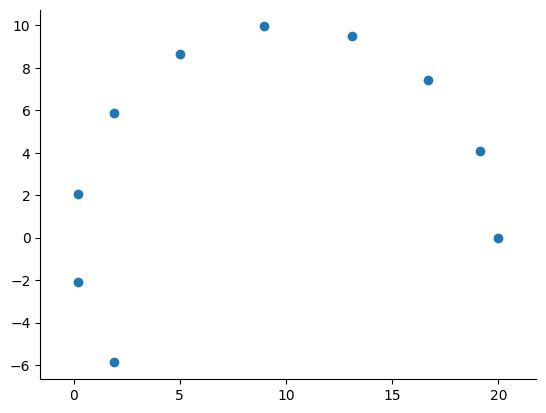

In [16]:
import math
R = 10.0 #in metres
omega = 2.0*2*math.pi/60. # in radians per second
x0 = R # in metres
y0 = 0 # in metres
dt = 2.0 # in seconds
duration = 20.0 #in seconds
num_iterations  = int(duration/dt)
x, y = [], []
t = 0
for _ in range(num_iterations):
    x.append(R*math.cos(omega*t)+x0)
    y.append(R*math.sin(omega*t)+y0)
    t += dt 

# plotting, ignore the details for now sicne we will cover this in a later lecture
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.axis("equal")
plt.show()

The question now is: can you simpify this code by using NumPy? Your focus should be on **avoiding for loops** and using NumPy's array operations instead.

In [ ]:
# Your code here